# Stock market clustering

This project will involve extacting stocks from Yahoo Finance and clustering them using K-means clustering to know which stocks have the same characteristics compared to others. The stock prices will be used to classify the stocks into a given category. 
This can be used in developing stock portfolios by having a pool of similar stocks to choose from.

Since the data has no target variables an unsupervised learning algorithm'like K-means clustering is most suited for clustering the stock data

In [2]:
# Importing important libraries

import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.simplefilter('ignore')

In [3]:
# List of companies stock to extract with their stock abbreviations

companies_dict = {
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'Navistar':'NAV',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'}

In [5]:
import fix_yahoo_finance as fyf
from pandas_datareader import data as pdr

D:\Anaconda\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



In [6]:
# Retriving stocks listed in the company dictionary

stocks = list(companies_dict.values())
start_date = datetime.datetime(2016,4,25)
end_date = datetime.datetime(2021,4,25)
df = fyf.download(stocks, start=start_date, end=end_date)

[*********************100%***********************]  25 of 25 completed


In [7]:
df.head()

Adj Close                                                \
                 AAPL        AMZN        AXP          BA        BAC   
Date                                                                  
2016-04-25  24.392525  626.200012  60.537849  118.346092  13.485782   
2016-04-26  24.223070  616.880005  60.998573  120.599854  13.602969   
2016-04-27  22.707241  606.570007  61.026234  124.075577  13.539866   
2016-04-28  22.013166  602.000000  60.666855  122.011871  13.332535   
2016-04-29  21.760138  659.590027  60.289082  122.011871  13.125198   

                                                                    ...  \
                  CVX          F         GE        HMC         IBM  ...   
Date                                                                ...   
2016-04-25  80.740318  10.689926  26.840096  28.690001  118.013016  ...   
2016-04-26  81.360725  10.823749  27.032562  28.709999  118.227104  ...   
2016-04-27  82.601524  10.871499  27.058811  28.469999  119.329445  ...   
2016-04-28  81.448219  11.213721  27.032562  27.230000  116.633118  ...   
2016-04-29  81.273224  10.791914  26.901337  26.959999  115.736954  ...   

             Volume                                                         \
                MCD      MSFT      NAV      NOC      PEP      TM       TXN   
Date                                                                         
2016-04-25  6979900  33226900   871771   698600  3501300  307000   4670200   
2016-04-26  4082300  33532600   908854  1390600  3222900  252500   3928800   
2016-04-27  4436200  43369300  1070605  1476800  3730900  271100   7123900   
2016-04-28  3385800  43134800  2056203   995200  4350200  740300   9417800   
2016-04-29  6276900  48411700  1483394   938000  4604000  496300  10774700   

                                        
                VLO      WBA       XOM  
Date                                    
2016-04-25  4362200  2961700   8076400  
2016-04-26  4213900  3400900   9425900  
2016-04-27  4611800  3584200  10463500  
2016-04-28  4581200  2876600  11276200  
2016-04-29  6701300  5421200  17885900  

[5 rows x 150 columns]

In [8]:
# Checking for null values in the stock data

df.isna().sum()

Adj Close  AAPL    0
           AMZN    0
           AXP     0
           BA      0
           BAC     0
                  ..
Volume     TM      0
           TXN     0
           VLO     0
           WBA     0
           XOM     0
Length: 150, dtype: int64

In [9]:
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T

In [10]:
# The movement calculates how much a stock changes during a trading day

movement = stock_close - stock_open

In [11]:
# Finding the sum of all differences for all trading days

sum_of_movement = np.sum(movement,1)

In [12]:
for i in range(len(companies_dict)):
    print('company:{}, change{}'.format(df['High'].columns[i], sum_of_movement[i]))

company:AAPL, change44.40737724304199
company:AMZN, change-814.442626953125
company:AXP, change3.750255584716797
company:BA, change-161.92032623291016
company:BAC, change6.1199951171875
company:CVX, change-55.5198974609375
company:F, change-10.650016784667969
company:GE, change-20.36884832382202
company:HMC, change-12.100019454956055
company:IBM, change-17.579818725585938
company:INTC, change31.609987258911133
company:JNJ, change2.6600189208984375
company:KO, change-7.920009613037109
company:LMT, change-119.67933654785156
company:MA, change2.2904739379882812
company:MCD, change23.010269165039062
company:MSFT, change58.22990798950195
company:NAV, change-34.32996845245361
company:NOC, change-51.52030944824219
company:PEP, change25.52007293701172
company:TM, change-44.220008850097656
company:TXN, change56.70996856689453
company:VLO, change-44.469947814941406
company:WBA, change-20.29003143310547
company:XOM, change-45.5600700378418


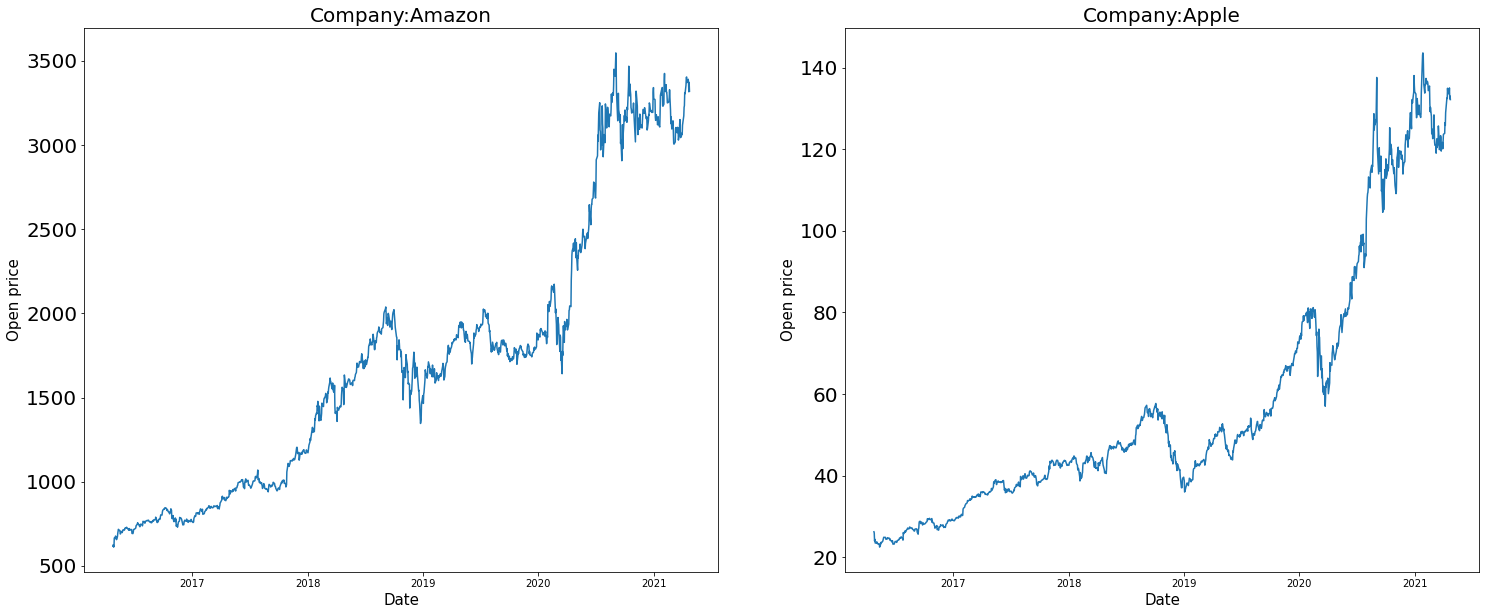

In [13]:
# Plotting the opening price for Amazon and Apple stock 
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.title('Company:Amazon', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Open price', fontsize = 15)
plt.plot(df['Open']['AMZN']);

plt.subplot(1,2,2)
plt.title('Company:Apple', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Open price', fontsize = 15)
plt.plot(df['Open']['AAPL']);

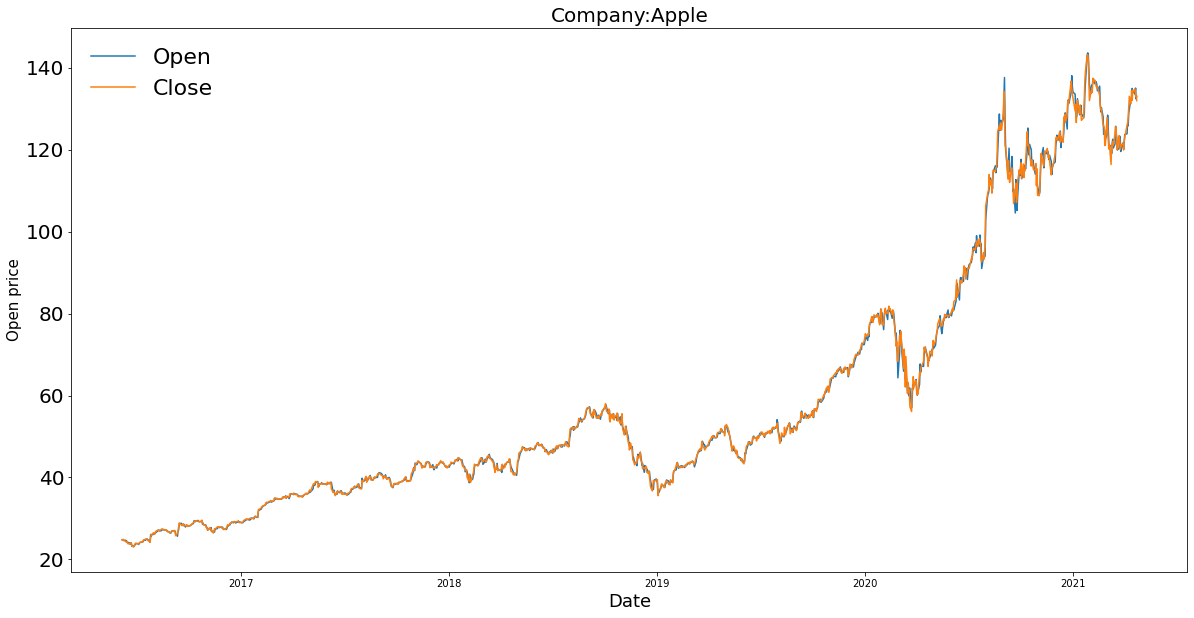

In [14]:
# Plotting the open and close stock price for Apple

plt.figure(figsize=(20,10))

plt.title('Company:Apple', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Open price', fontsize = 15)
plt.plot(df.iloc[30:-1]['Open']['AAPL'], label='Open');
plt.plot(df.iloc[30:-1]['Close']['AAPL'], label='Close');
plt.legend(loc='upper left', frameon=False, framealpha=1, prop={'size':22});

Overall stock prices have been on the rise since 2017 shown above in the plot of Apple stock from the first 30 days after April the 26th in 2016 to the same date in 2021

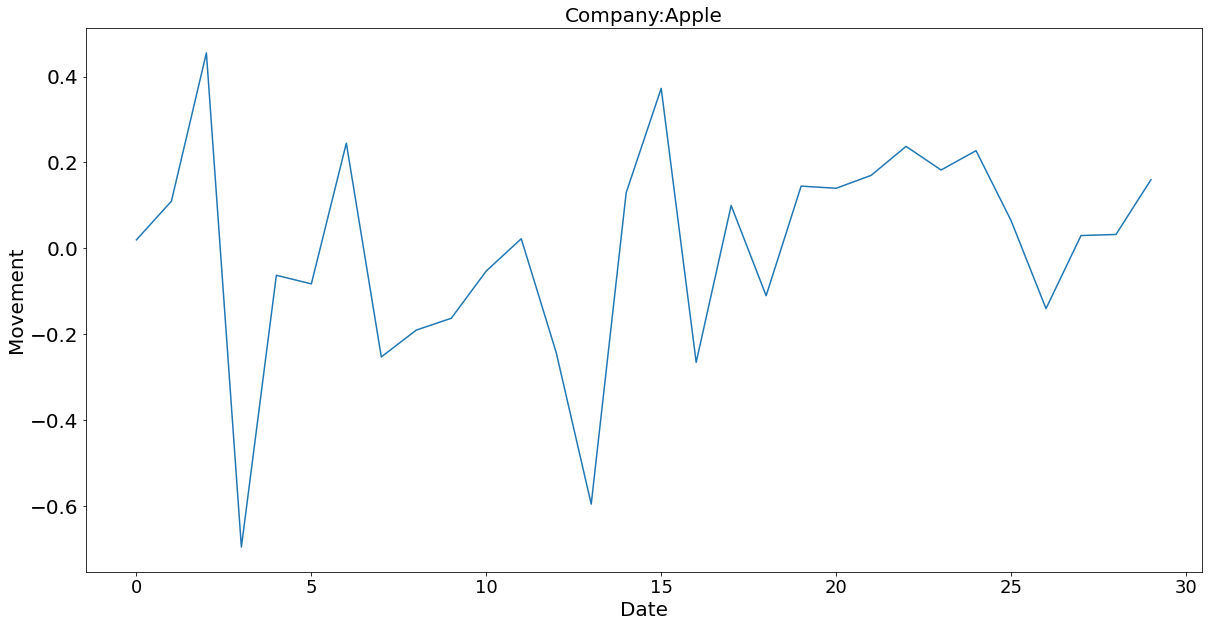

In [15]:
plt.figure(figsize=(20,10))

plt.title('Company:Apple', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Movement', fontsize = 20)
plt.plot(movement[0][0:30]);

The variation of the movement of Apple stock initially was a lot but it later reduced 

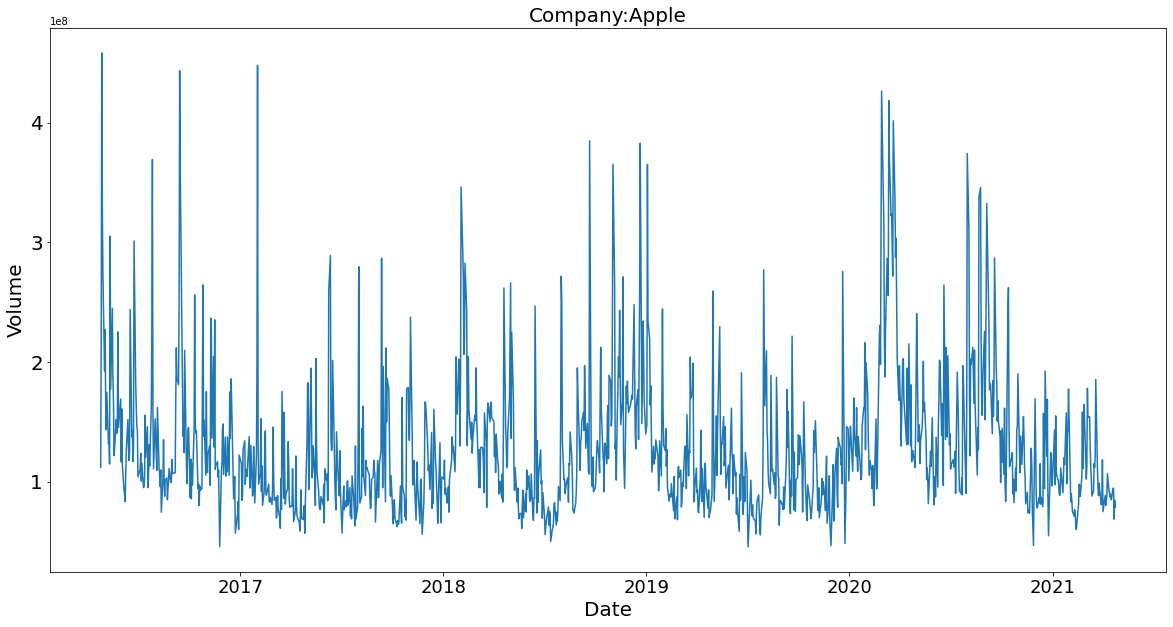

In [16]:
plt.figure(figsize=(20,10))

plt.title('Company:Apple', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Volume', fontsize = 20)
plt.plot(df['Volume']['AAPL'], label='Open');

The volume traded and peak volume shows that stocks on certain days had the most sales and are as a result of certain factors that affect the image of the company on a given day. Apple had its lowest peak volumes during the 2019 2020 period.

For further analysis and data modeling the data has to be normalized so that all of the stock data are on the same scale

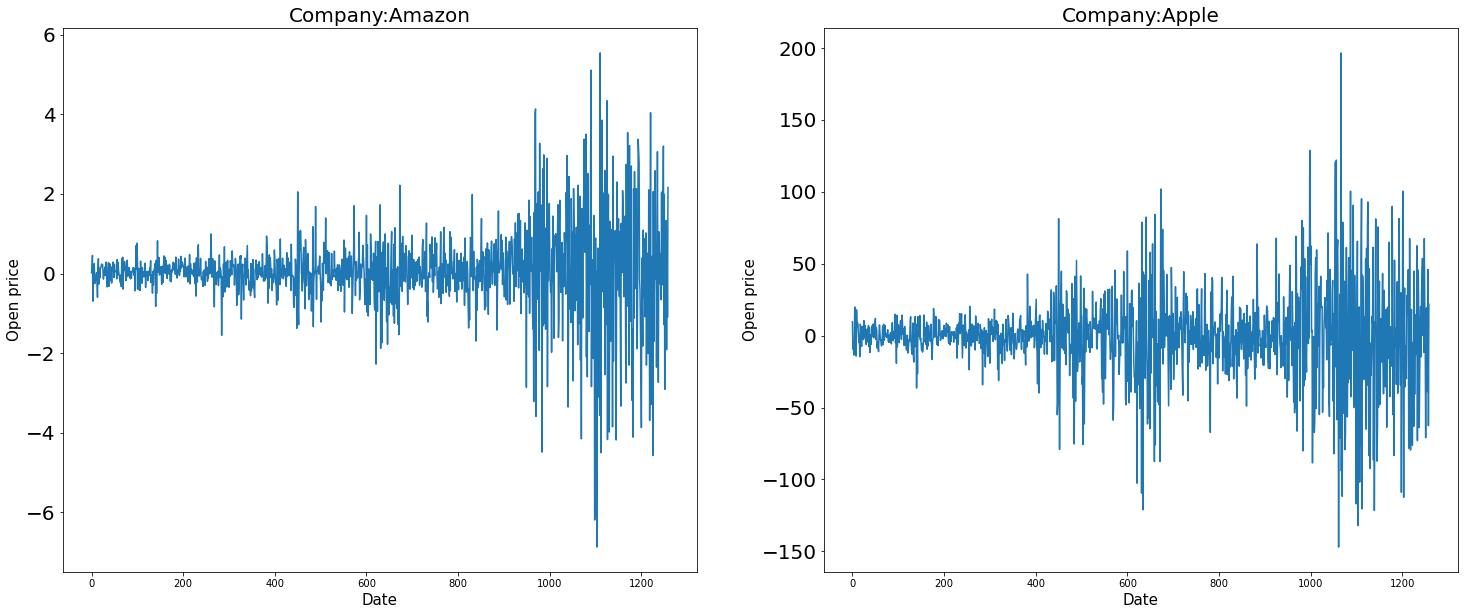

In [17]:
# Visualizing the daily movements from Apple

plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.title('Company:Amazon', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Open price', fontsize = 15)
plt.plot(movement[0]);

plt.subplot(1,2,2)
plt.title('Company:Apple', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Open price', fontsize = 15)
plt.plot(movement[1]);

In [18]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
normalized_mov = norm.fit_transform(movement)

In [20]:
print(normalized_mov.min())
print(normalized_mov.max())
print(normalized_mov.mean())

-0.3096370279316067
0.23844877378537657
-0.0003582799055121372


The values have been normalized with their values between -1 and 1. The same normalized movements for Apple and Amazon are below


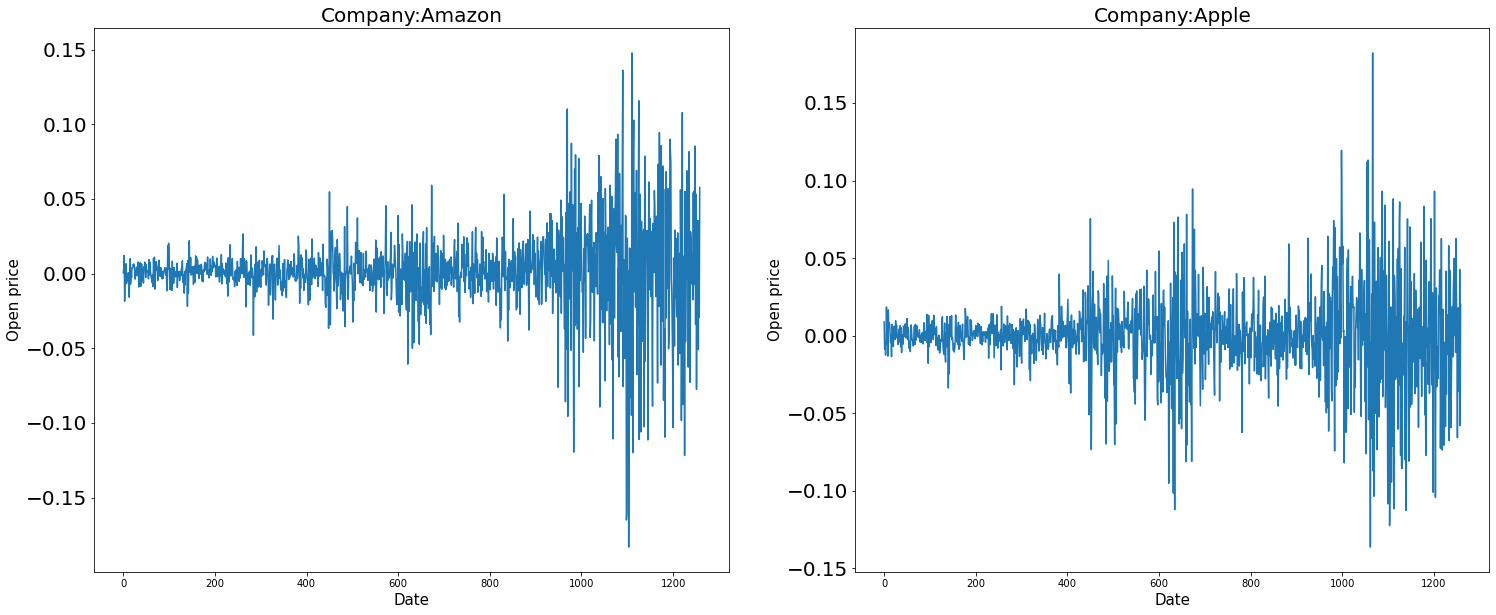

In [22]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.title('Company:Amazon', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Open price', fontsize = 15)
plt.plot(normalized_mov[0]);

plt.subplot(1,2,2)
plt.title('Company:Apple', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Open price', fontsize = 15)
plt.plot(normalized_mov[1]);

In [24]:
# Creating a pipeline to cluster the stock data

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [28]:
# Initializing the normalizer
normalizer = Normalizer()

# Initializing the K-means model
K_model = KMeans(n_clusters=5, max_iter=1000, random_state=1)

# Initializing the pipeline to fit the dataset
pipeline = make_pipeline(normalizer, K_model)

# Fitting the data to the pipeline
pipe_fit = pipeline.fit_predict(movement)

print(pipe_fit)

[1 1 0 3 0 0 3 0 3 3 1 4 4 2 1 4 1 0 2 4 3 1 0 3 0]


In [29]:
# Displaying what company belongs to what cluster

df = pd.DataFrame({'Cluster': pipe_fit, 'Company': list(companies_dict.keys())})

In [32]:
df.sort_values('Cluster')

,Cluster,Company
24,0,Bank of America
22,0,Valero Energy
2,0,Walgreen
4,0,Boeing
5,0,Lockheed Martin
17,0,Johnson & Johnson
7,0,Intel
21,1,Chevron
16,1,Coca Cola
14,1,American Express


In [33]:
movement.shape

(25, 1259)

PCA can be used to reduce the dimensions of the columns to two dimensions to visualize the clusters

In [35]:
from sklearn.decomposition import PCA

normalizer = Normalizer()

# Initializing the K-means model
K_model = KMeans(n_clusters=5, max_iter=1000, random_state=1)

# Initializing PCA 
pca = PCA(n_components=2)

# Initializing the pipeline to fit the dataset
pipeline = make_pipeline(normalizer, pca, K_model)

# Fitting the data to the pipeline
pipe_fit = pipeline.fit(movement)

predictions = pipe_fit.predict(movement)

In [37]:
df2 = pd.DataFrame({'Cluster': predictions, 'Company': list(companies_dict.keys())}).sort_values(by='Cluster')

In [38]:
df2

,Cluster,Company
14,0,American Express
21,0,Chevron
10,0,Texas Instruments
8,1,Navistar
15,1,Pepsi
20,1,Exxon
23,1,Ford
9,1,IBM
24,2,Bank of America
7,2,Intel


Plotting the decision boundaries to see the cluster of stocks

<Figure size 432x288 with 0 Axes>

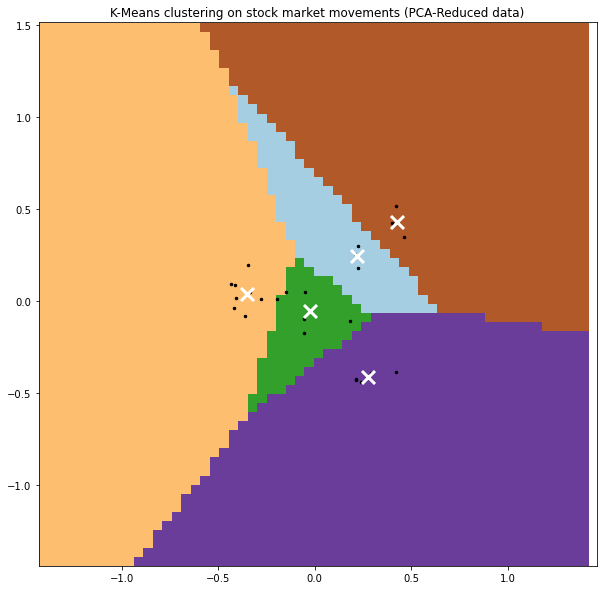

In [49]:
from sklearn.decomposition import PCA

# Reducing the data's dimensions
pca = PCA(n_components=2).fit_transform(normalized_mov)

# Step size of the mesh
h = 0.05

# Plotting the decision boundary
x_min, x_max = pca[:,0].min()-1, pca[:,0].max() + 1
y_min, y_max = pca[:,1].min()-1, pca[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Getting labels for the points using the kmeans model
kpred = K_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshaping the predictions for plotting
kpred = kpred.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10));
plt.imshow(kpred,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')


plt.plot(pca[:,0],pca[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = K_model.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)

plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()